In [11]:
!pip install pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer

df = pd.read_csv("FDC.csv")
df.head(10)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


In [12]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

0

In [13]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.mean()))

cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

df.isnull().sum()


,0
GPA,0
Gender,0
breakfast,0
calories_chicken,0
calories_day,0
...,...
type_sports,0
veggies_day,0
vitamins,0
waffle_calories,0


In [14]:
df = df.drop_duplicates()
df.shape


(125, 61)

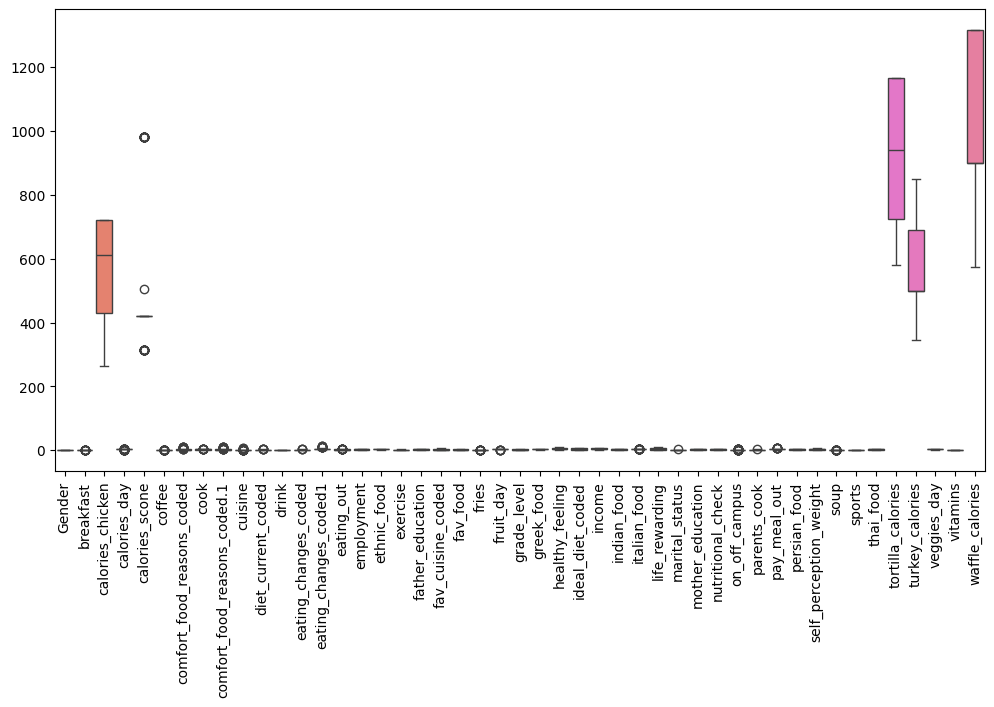

(9, 61)

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.show()

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape


In [16]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [17]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [18]:
label_encoder = LabelEncoder()
df["grade_level_encoded"] = label_encoder.fit_transform(df["grade_level"])


In [19]:
df = pd.get_dummies(df, columns=["fav_cuisine"], drop_first=True)


In [20]:
threshold = 0.05 * len(df)

for col in ["fav_cuisine"]:
    counts = df[col].value_counts()
    rare_labels = counts[counts < threshold].index
    df[col] = df[col].replace(rare_labels, "Other")


KeyError: 'fav_cuisine'

In [21]:
print(df.columns)


Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine_coded',
       'fav_food', 'food_childhood', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'healthy_meal', 'ideal_diet',
       'ideal_diet_coded', 'income', 'indian_food', 'italian_food',
       'life_rewarding', 'marital_status', 'meals_dinner_friend',
       'mother_education', 'mother_profession', 'nutritional_check',
       'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calor

In [22]:
threshold = 0.05 * len(df)
counts = df["fav_cuisine_coded"].value_counts()
rare_labels = counts[counts < threshold].index
df["fav_cuisine_coded"] = df["fav_cuisine_coded"].replace(rare_labels, "Other")


In [23]:
df["income_log"] = np.log1p(df["income"])


In [24]:
df["income_sqrt"] = np.sqrt(df["income"])


In [28]:
df["employment"] = pd.to_datetime(df["employment"], errors='coerce')
df["year"] = df["employment"].dt.year
df["month"] = df["employment"].dt.month
df["day"] = df["employment"].dt.day
